### Exploring one dimensional Data
We'll start computing a few summary statistics on one-dimensional dataset
Statistics to compute:
- How many data points
- Smallest values
- Largest values
- Mean
- Standard deviation


The we'll create an histogram, in which we group our data into discrete buckets and count how many values fall into each bucket

In [4]:
from typing import List,Dict
from collections import Counter
import math
import numpy as np

In [3]:
import matplotlib.pyplot as plt


In [27]:
def bucketsize(point:float,bucket_size : float) -> float:
    '''Floor the point to the next lower multiple of bucket_size'''
    return bucket_size * math.floor(point/bucket_size)

def make_histogram(points:List[float],bucket_size : float) -> Dict[float,int]:
    return Counter(bucketsize(point,bucket_size) for point in points)

def plot_histogram(points : List[float], bucket_size:float,title:str=""):
    histogram = make_histogram(points,bucket_size)
    plt.bar(histogram.keys(),histogram.values(),width=bucket_size)
    plt.title = title

import random
from scratch.probability import inverse_normal_cdf

random.seed(0)
size = 10000
uniform = np.random.uniform(-100,100,size)
normal = np.random.normal(0,57,size)

In [14]:
print(f"uniform: {uniform}")
print(f"normal: {normal}")

uniform: [-10.97872917  87.08870562 -98.08753677 ... -40.22743505 -85.34607021
 -28.72349062]
normal: [-63.87589813   8.23213783  64.13818301 ... -55.88290926  20.92334065
  81.23839918]


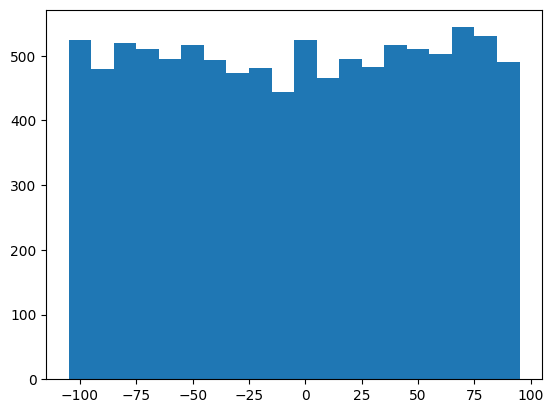

In [29]:
plot_histogram(uniform,10,"Uniform")


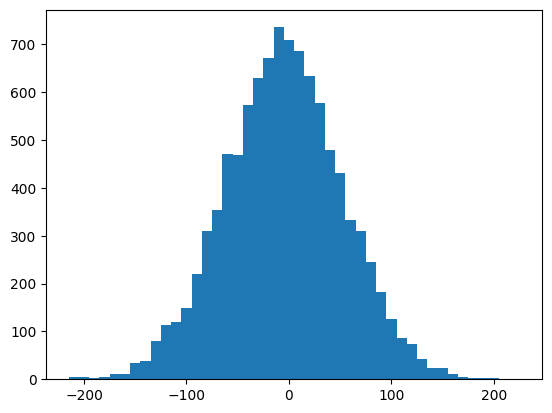

In [30]:
plot_histogram(normal,10,"Normal")

### Two dimensions
Let's scatter the data

In [31]:
random_normal = np.random.standard_normal(10000)


In [41]:
xs = random_normal
ys1 = xs + np.random.standard_normal(10000) / 2
ys2 = -xs + np.random.standard_normal(10000) / 2

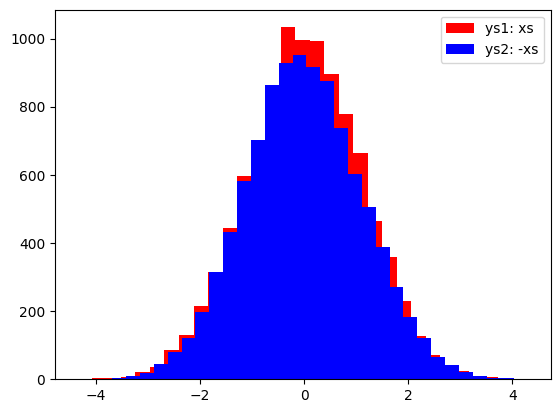

In [49]:
fig,ax = plt.subplots()
ax.hist(ys1,bins=30,color='r',label="ys1: xs")

ax.hist(ys2,bins=30,color='b',label="ys2: -xs")
ax.legend()


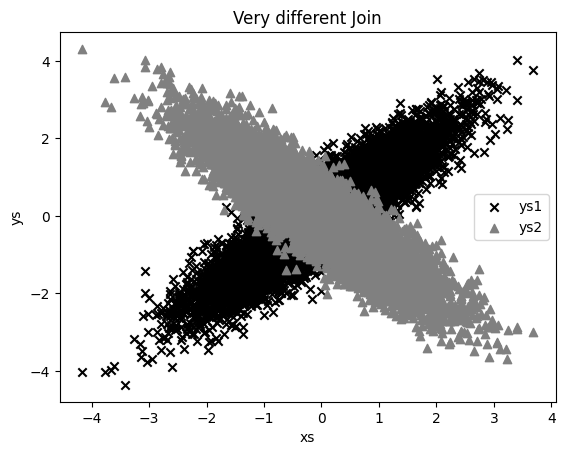

In [64]:
fix,ax = plt.subplots()
ax.scatter(xs,ys1,marker="x",color='black',label='ys1')
ax.scatter(xs,ys2,marker="^",color='gray',label='ys2')
ax.legend()
ax.set_xlabel('xs')
ax.set_ylabel('ys')
ax.set_title('Very different Join')
plt.show()

### Many dimensions
With many dimensions we want to know how all the dimensions relate to one another.
A simple approach is to look at the correlation matrix. Where the entry in row i and column j is the correlation between the ith dimension and the jth dimension of the data


### Cleaning and munging
Real world data is dirty. We often have to do some work before we can use it.
If we have invalid data, we have to decide what to do with it.
- Get ride of them
- Go back to the source and fix the bad/missing data
- Do nothing

We also need to look for outliers, which are data that will disturb our data.

### Manipulating data



### Rescaling
Many techniques are sensitive to the scale of our data.
When dimensions aren't comparable with one another, we'll sometimes rescale out data so that each dimension has mean 0 and standard deviation 1 (Standard normal).
This effectively gets rid of the units, converting each dimension to "standard deviations from the mean"

### Dimensionality reduction
Sometimes the acutal, or useful dimensions of the data might not correspond to the dimensions we have.
In this cases we can use a technyque called PCA (principal component analysis) to extract one or more dimension that capture as much of the variation in the data as possible.
This technique is helpfull because it can help us clean our data by eliminating noise dimensions and consolidating highly correlated dimensions